In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pyreadstat
import scipy
from utils import sim, standardize, jitter_binary, bin_edges_equalN, plot_binned_residuals
%load_ext autoreload
%autoreload 2

In [50]:
data_folder = 'data/arsenic/'
data_df = pd.read_csv(data_folder + 'wells.dat', sep=" ")

In [52]:
data_df['dist100'] = data_df.dist/100  # transform dist in 100 m

In [53]:
X = sm.add_constant(data_df[['dist100']])
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4
deviance: 4076.2, difference with null: 41.9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.01017
Time:                        11:37:15   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

In [55]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.scatterplot(data_df.dist100, jitter_binary(data_df.switch, jitter=0.15), ax=ax)
xlims = ax.get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
plt.plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100))

In [62]:
X = standardize(data_df[['dist100', 'arsenic']], scale_factor=1)
X['dist100:arsenic'] = X.dist100 * X.arsenic
X = sm.add_constant(X)
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.650270
         Iterations 5
deviance: 3927.6, difference with null: 190.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3016
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.04625
Time:                        12:02:51   Log-Likelihood:                -1963.8
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 4.830e-41
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3511      0.040      8.810      0.000       0.273       0.429
dist100            -0.3362      0.040     -8.337      0.000      -0.415      -0.257
arsenic             0.5199      0.047     11.159      0.000       0.429       0.611
dist100:arsenic    -0.0762      0.044     -1.748      0.080      -0.162       0.009
===================================================================================
"""

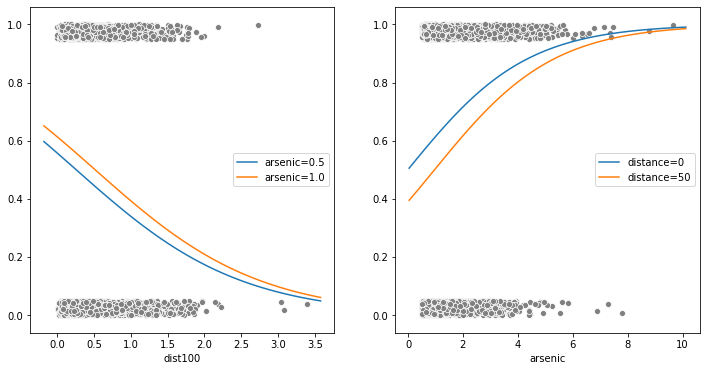

In [57]:
fig, ax = plt.subplots(figsize=[12, 6], ncols=2)
sns.scatterplot(data_df.dist100, jitter_binary(data_df.switch), color='grey', ax=ax[0])
xlims = ax[0].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100 + res.params.arsenic * 0.5), label='arsenic=0.5')
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.dist100 + res.params.arsenic * 1.), label='arsenic=1.0')
ax[0].legend()
sns.scatterplot(data_df.arsenic, jitter_binary(data_df.switch), color='grey', ax=ax[1])
xlims = ax[1].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.arsenic + res.params.dist100 * 0), label='distance=0')
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.arsenic + res.params.dist100 * 0.5), label='distance=50')
ax[1].legend()

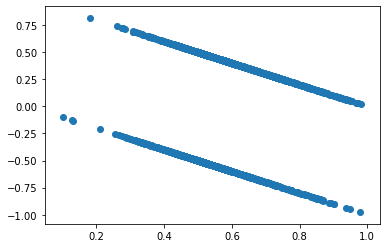

In [63]:
residDF = pd.DataFrame()
residDF['pred'] = res.predict(X)
residDF['resid'] = data_df.switch - residDF.pred
plt.scatter(residDF.pred, residDF.resid)

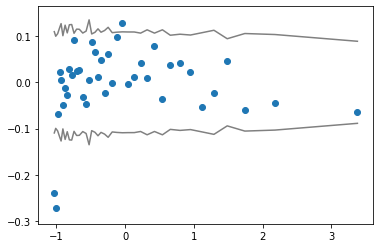

In [66]:
_ = plot_binned_residuals(X, data_df.switch, res, x_variable=X.arsenic, bins=40)

## Model arsenic on the log scale

This solves the pattern shown by residuals.

In [67]:
X = sm.add_constant(data_df[['dist100', 'educ']])
X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.639587
         Iterations 5
deviance: 3863.1, difference with null: 255.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3013
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:                 0.06192
Time:                        12:34:23   Log-Likelihood:                -1931.6
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 3.517e-52
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5160      0.104      4.968      0.000       0.312       0.720
dist100                -1.3389      0.199     -6.718      0.000      -1.730      -0.948
educ                   -0.0010      0.015     -0.064      0.949      -0.031       0.029
log_arsenic             0.9067      0.139      6.513      0.000       0.634       1.180
dist100:educ            0.0846      0.027      3.141      0.002       0.032       0.137
dist100:log_arsenic    -0.1567      0.185     -0.846      0.397      -0.520       0.206
log_arsenic:educ        0.0150      0.018      0.855      0.393      -0.019       0.049
=======================================================================================
"""

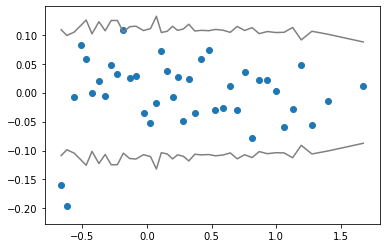

In [68]:
_ = plot_binned_residuals(X, data_df.switch, res, x_variable=X.log_arsenic, bins=40)

# Error rate

In [70]:
y = data_df.switch
error_rate = np.mean(((res.predict(X) >= 0.5) & (y==0)) | ((res.predict(X) < 0.5) & (y==1)))
pred_accuracy_null = np.sum(y==1) / len(y)
print("Error rate is: {:.2f}, error rate of null model is: {:.2f}".format(error_rate, 1 - pred_accuracy_null))

Error rate is: 0.36, error rate of null model is: 0.42


# Deviance

In [75]:
-2*res.llnull

4118.099217425315

In [80]:
X = sm.add_constant(data_df[['dist100', 'educ']])
X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
#X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))

Optimization terminated successfully.
         Current function value: 0.639709
         Iterations 5
deviance: 3863.8, difference with null: 254.3


# Average predictive comparison

In [82]:
X = sm.add_constant(data_df[['dist100', 'educ', 'arsenic']])
#X['log_arsenic'] = np.log(data_df.arsenic)
X['dist100:educ'] = X.educ * X.dist100
#X['dist100:log_arsenic'] = X.log_arsenic * X.dist100
#X['log_arsenic:educ'] = X.educ * X.log_arsenic
model = sm.Logit(endog=data_df.switch, exog=X)
res = model.fit()
b = res.params
hi = 1
low = 0
deltas = (scipy.special.expit(b.const + hi * b.dist100 + b.arsenic * X.arsenic + b.educ * X.educ + b['dist100:educ'] * X.educ * hi)
 - scipy.special.expit(b.const + low * b.dist100 + b.arsenic * X.arsenic + b.educ * X.educ + b['dist100:educ'] * X.educ * low))
print('avg pred difference in prob.: {:.2f}'.format(np.mean(deltas)))

Optimization terminated successfully.
         Current function value: 0.645058
         Iterations 5
avg pred difference in prob.: -0.21


# Exercises

## Ex 1

In [2]:
import pyreadstat
data_nes, meta = pyreadstat.read_dta('data/nes/nes5200_processed_voters_realideo.dta')

In [3]:
data = data_nes.loc[data_nes.year==1992, ['presvote', 'gender', 'educ1', 'race', 'age', 'partyid7', 'ideo7']]
# encoding of variables
# democrat to rep and liberal to conserv
# 1: democrat, 2: rep, 3: third party 
# 0: NA, 1: grade school, 2: high sch, 3: some college, 4: college
data['female'] = data.gender - 1
factor_race = sm.tools.categorical(data, col='race', drop=True)
factor_race = factor_race.rename(columns={1: 'white', 2: 'black', 3: 'asian', 4: 'native', 5: 'hispanic', 7: 'other', 9: 'NA'})
factor_race = factor_race.drop(columns='native')  # others and NA are not there for year 1992
data = pd.concat([data, factor_race.set_index(data.index)], axis=1)
# filter out NaN voters and third party
data = data.loc[np.logical_not(np.isnan(data.presvote)), :]
data = data.loc[np.logical_not(data.presvote==3), :]
data.presvote = data.presvote - 1
# impute education and preferences where not given
data.loc[np.isnan(data.educ1), 'educ1'] = np.int(np.round(data.educ1.mean()))
data.loc[np.isnan(data.partyid7), 'partyid7'] = np.int(np.round(data.partyid7.mean()))
data.loc[np.isnan(data.ideo7), 'ideo7'] = np.int(np.round(data.ideo7.mean()))

In [48]:
y = data.presvote
X = standardize(data[['age', 'educ1', 'partyid7', 'ideo7']], scale_factor=1)
X = pd.concat([X, data[['female', 'white', 'black', 'asian', 'hispanic']]], axis=1)
X['partyid7:female'] = X['partyid7'] * X['female']
X['ideo7:educ'] = X['ideo7'] * X['educ1']
X = sm.add_constant(X)
model = sm.Logit(endog=y, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.308862
         Iterations 8
deviance: 805.5, difference with null: 962.8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               presvote   No. Observations:                 1304
Model:                          Logit   Df Residuals:                     1292
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.5445
Time:                        11:52:42   Log-Likelihood:                -402.76
converged:                       True   LL-Null:                       -884.18
Covariance Type:            nonrobust   LLR p-value:                1.891e-199
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6422      0.460     -1.396      0.163      -1.543       0.259
age                -0.0121      0.093     -0.130      0.896      -0.194       0.170
educ1               0.0505      0.102      0.494      0.621      -0.150       0.251
partyid7            2.3276      0.204     11.421      0.000       1.928       2.727
ideo7               0.7857      0.110      7.116      0.000       0.569       1.002
female              0.3459      0.199      1.739      0.082      -0.044       0.736
white              -0.0866      0.445     -0.195      0.846      -0.959       0.786
black              -2.2510      0.607     -3.706      0.000      -3.441      -1.061
asian               0.9435      0.854      1.104      0.270      -0.731       2.618
hispanic            0.4284      0.576      0.744      0.457      -0.701       1.557
partyid7:female    -0.5266      0.246     -2.142      0.032      -1.008      -0.045
ideo7:educ          0.2859      0.112      2.547      0.011       0.066       0.506
===================================================================================
"""

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=[8, 6])
sns.scatterplot(X.partyid7, jitter_binary(y, jitter=0.15), ax=ax[0])
xlims = ax[0].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.partyid7), label='males')
ax[0].plot(xx, scipy.special.expit(res.params.const + xx * res.params.partyid7 + res.params.female + res.params['partyid7:female'] * xx), label='females')
ax[0].legend()
sns.scatterplot(X.ideo7, jitter_binary(y, jitter=0.15), ax=ax[1])
xlims = ax[1].get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.ideo7 + res.params.educ1 * 1.27107891 + res.params['ideo7:educ'] * xx * 1.27107891), label='college')
ax[1].plot(xx, scipy.special.expit(res.params.const + xx * res.params.ideo7 + res.params.educ1 * -1.90824379 + res.params['ideo7:educ'] * xx * -1.90824379), label='grade school')
ax[1].legend()

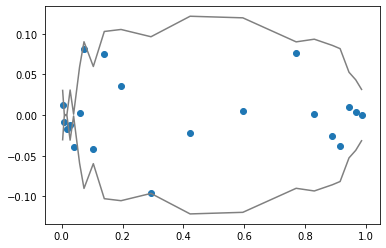

In [56]:
_ = plot_binned_residuals(X, y, res, x_variable=None, bins=20)

# Ex 7

In [44]:
x = np.arange(0, 20)
y = [1]*3 + [0]*10 + [1]*7
X = sm.add_constant(x)
model = sm.Logit(endog=y, exog=X)
res = model.fit()
print('deviance: {:.1f}, difference with null: {:.1f}'.format(-2*res.llf, res.llr))
res.summary()

Optimization terminated successfully.
         Current function value: 0.630652
         Iterations 5
deviance: 25.2, difference with null: 2.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                 0.09016
Time:                        11:02:37   Log-Likelihood:                -12.613
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                    0.1139
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2358      0.956     -1.292      0.196      -3.110       0.638
x1             0.1301      0.087      1.491      0.136      -0.041       0.301
==============================================================================
"""

In [45]:
fig, ax = plt.subplots(ncols=1, figsize=[8, 6])
sns.scatterplot(X[:, 1], jitter_binary(y, jitter=0.15), ax=ax)
xlims = ax.get_xlim()
xx = np.linspace(xlims[0], xlims[1], 100)
ax.plot(xx, scipy.special.expit(res.params[0] + xx * res.params[1]))

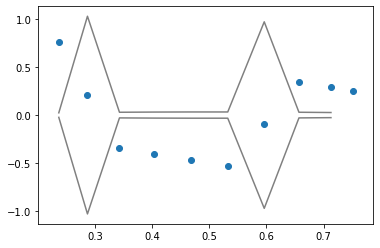

In [47]:
_ = plot_binned_residuals(X, y, res, x_variable=None, bins=10)

## Ex 8

In [17]:
data_folder = 'data/rodents/'
data_df = pd.read_csv(data_folder + 'rodents.dat', sep=" ")

In [26]:
data_df.rodent2.unique()

array([ 1.,  0., nan])